In [1]:
#import dependencies
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
#load and view Housing Prices
file = pd.read_csv("home_data.csv")
Housing_prices_df = pd.DataFrame(file)
Housing_prices_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
#view column names
Housing_prices_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
#Checking for NA's
Housing_prices_df[Housing_prices_df.isna().any(axis=1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [5]:
#removed irrelevant data for determing price
Housing_prices_df = Housing_prices_df.drop(columns=['date','zipcode','lat','long'])
Housing_prices_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,2487200875,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,6600060120,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
21610,1523300141,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007
21611,291310100,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287


In [6]:
#set house id as index
Housing_prices_df = Housing_prices_df.set_index('id')
Housing_prices_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,
7129300520,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
6414100192,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
5631500400,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
2487200875,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
1954400510,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
6600060120,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
1523300141,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007


In [54]:
#checking value count of columns
#Housing_prices_df.waterfront.value_counts()
#Housing_prices_df.view.value_counts()
#Housing_prices_df.bedrooms.value_counts()
#Housing_prices_df.bathrooms.value_counts()
Housing_prices_df.grade.value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [8]:
#sort by price
Housing_prices_df = Housing_prices_df.sort_values(by='price', ascending=False)
Housing_prices_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,
6762700020,7700000,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,3940,8800
9808700762,7062500,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,3930,25449
9208900037,6885000,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,4540,42730
2470100110,5570000,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,3560,24345
8907500070,5350000,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883800011,82000,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,1140,11250
3028200080,81000,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,860,9000
8658300340,80000,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,1200,7500


In [9]:
#for regression purposes, added yr_renovated to yr_built
Housing_prices_df['yr_built'] = np.where(Housing_prices_df['yr_renovated'] != 0, Housing_prices_df['yr_renovated'], Housing_prices_df['yr_built']) 
Housing_prices_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,
6762700020,7700000,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1987,1987,3940,8800
9808700762,7062500,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,2001,2001,3930,25449
9208900037,6885000,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,4540,42730
2470100110,5570000,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,3560,24345
8907500070,5350000,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883800011,82000,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,1140,11250
3028200080,81000,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,860,9000
8658300340,80000,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,1200,7500


In [10]:
#dropped yr_renovated column
Housing_prices_df = Housing_prices_df.drop(columns='yr_renovated')
Housing_prices_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,
6762700020,7700000,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1987,3940,8800
9808700762,7062500,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,2001,3930,25449
9208900037,6885000,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,4540,42730
2470100110,5570000,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,3560,24345
8907500070,5350000,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883800011,82000,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,1140,11250
3028200080,81000,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,860,9000
8658300340,80000,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,1200,7500


In [15]:
# removed rows that didnt make sense. i.e. 0 bedrooms or bathrooms and one house with 33 bedrooms and 1640 sqft of living space
new_housing_prices_df = Housing_prices_df[((Housing_prices_df.bedrooms != 33) &(Housing_prices_df.bedrooms != 0) & (Housing_prices_df.bathrooms != 0.00))]
new_housing_prices_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,
6762700020,7700000,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1987,3940,8800
9808700762,7062500,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,2001,3930,25449
9208900037,6885000,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,4540,42730
2470100110,5570000,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,3560,24345
8907500070,5350000,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623049041,82500,2,1.00,520,22334,1.0,0,0,2,5,520,0,1951,1572,10570
3883800011,82000,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,1140,11250
3028200080,81000,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,860,9000


In [68]:
#a lot of these columns could have an impact on price
#time to visualize the data


# Created a function to perform linear regression on the data and plot it
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on housing data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    #plt.xlim(0, 8)
    plt.xlabel("price")
    plt.ylabel(y_label)
    plt.ticklabel_format(useOffset=False, style="plain")
    plt.rcParams["figure.figsize"] = (20,9)
    plt.show()

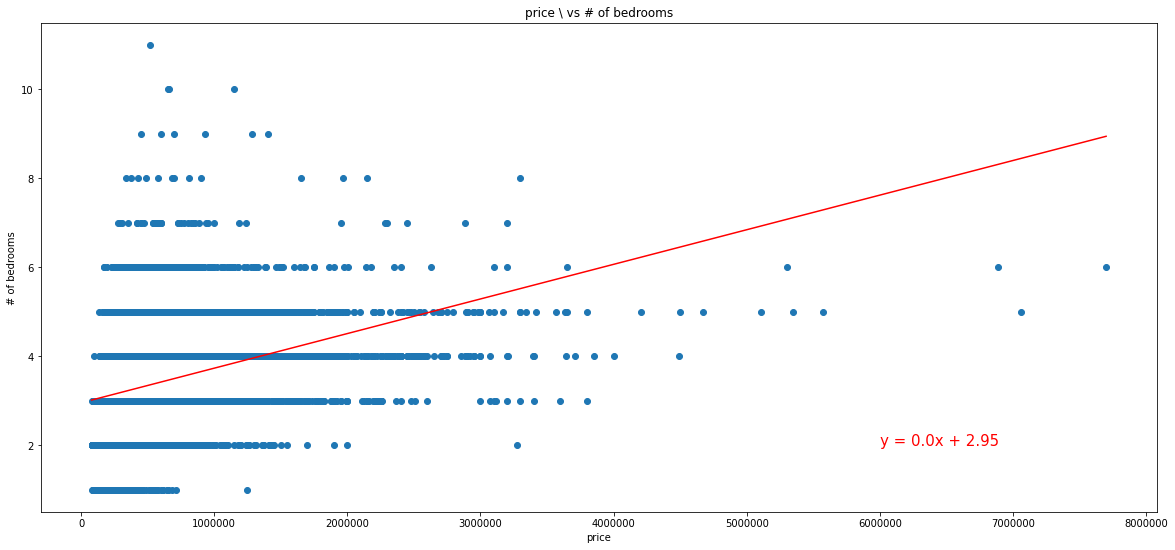

In [92]:
# Linear regression on # of bedrooms
x_values = new_housing_prices_df["price"]
y_values = new_housing_prices_df["bedrooms"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'price \ vs # of bedrooms' 
                        , '# of bedrooms',(6000000, 2))

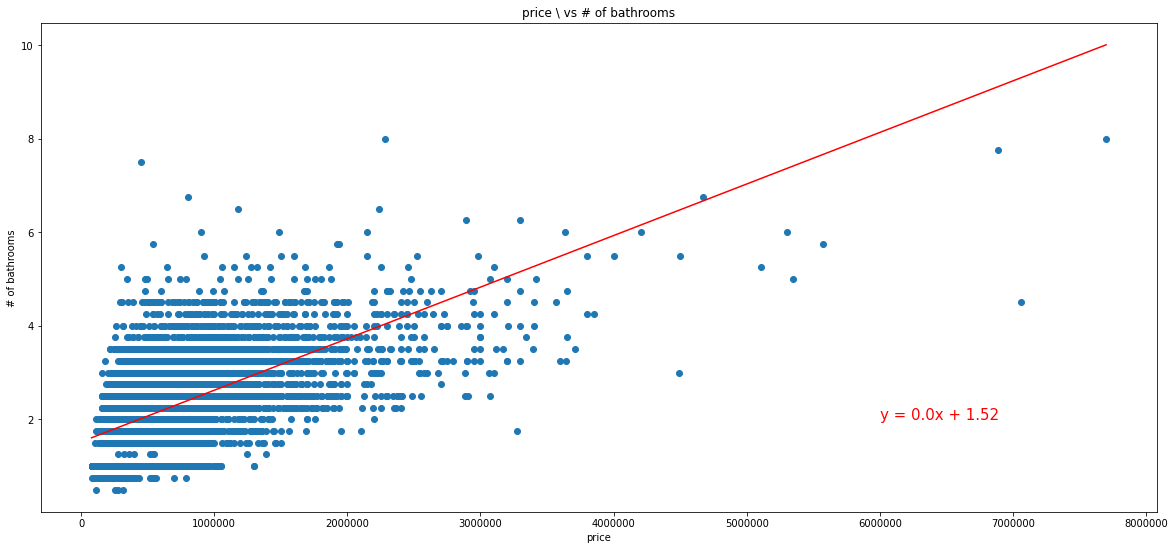

In [91]:
# Linear regression on # of bedrooms
x_values = new_housing_prices_df["price"]
y_values = new_housing_prices_df["bathrooms"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'price \ vs # of bathrooms' 
                        , '# of bathrooms',(6000000, 2))

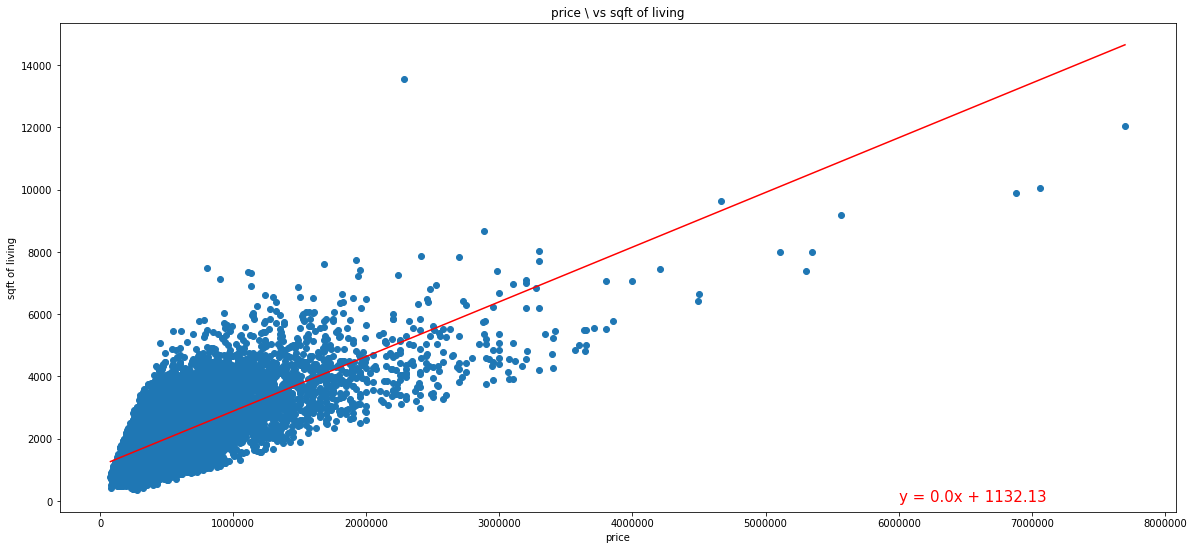

In [90]:
# Linear regression on # of bedrooms
x_values = new_housing_prices_df["price"]
y_values = new_housing_prices_df["sqft_living"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'price \ vs sqft of living' 
                        , 'sqft of living',(6000000,2))

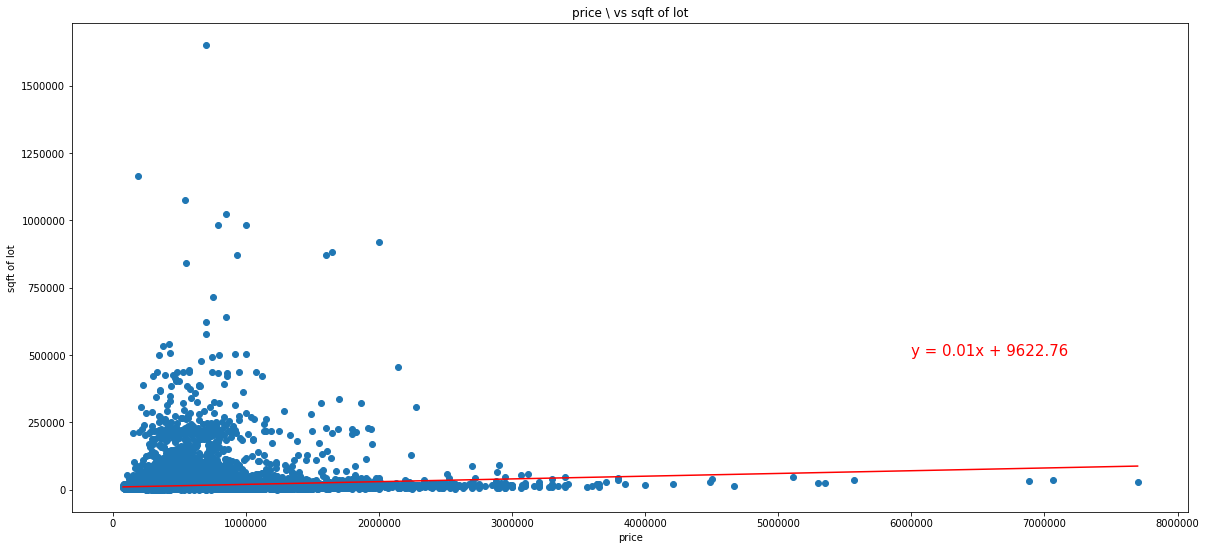

In [89]:
# Linear regression on # of bedrooms
x_values = new_housing_prices_df["price"]
y_values = new_housing_prices_df["sqft_lot"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'price \ vs sqft of lot' 
                        , 'sqft of lot',(6000000,500000))

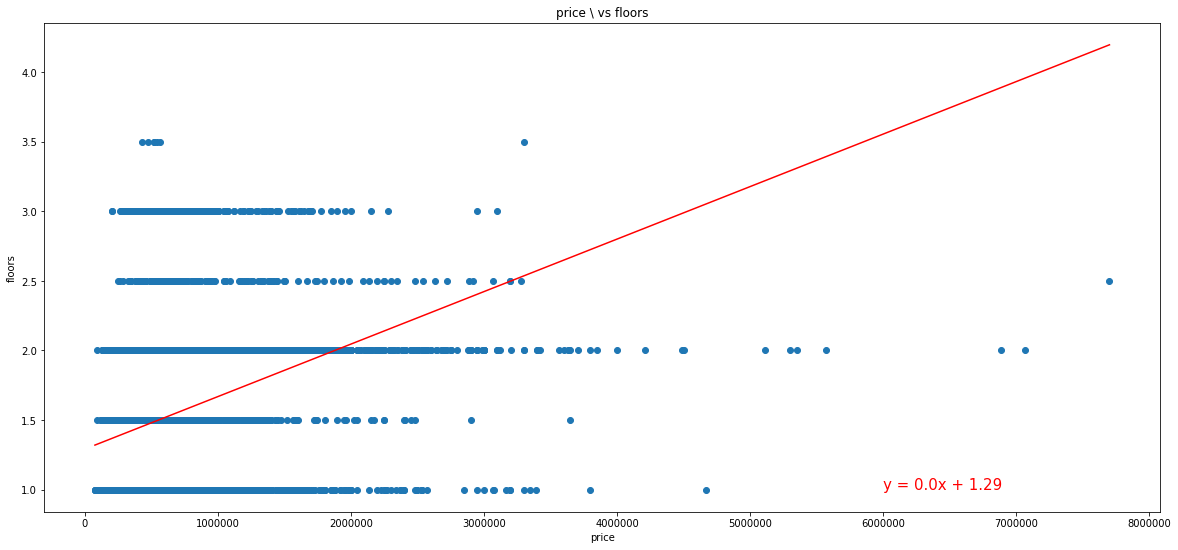

In [88]:
# Linear regression on # of bedrooms
x_values = new_housing_prices_df["price"]
y_values = new_housing_prices_df["floors"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'price \ vs floors' 
                        , 'floors',(6000000, 1))

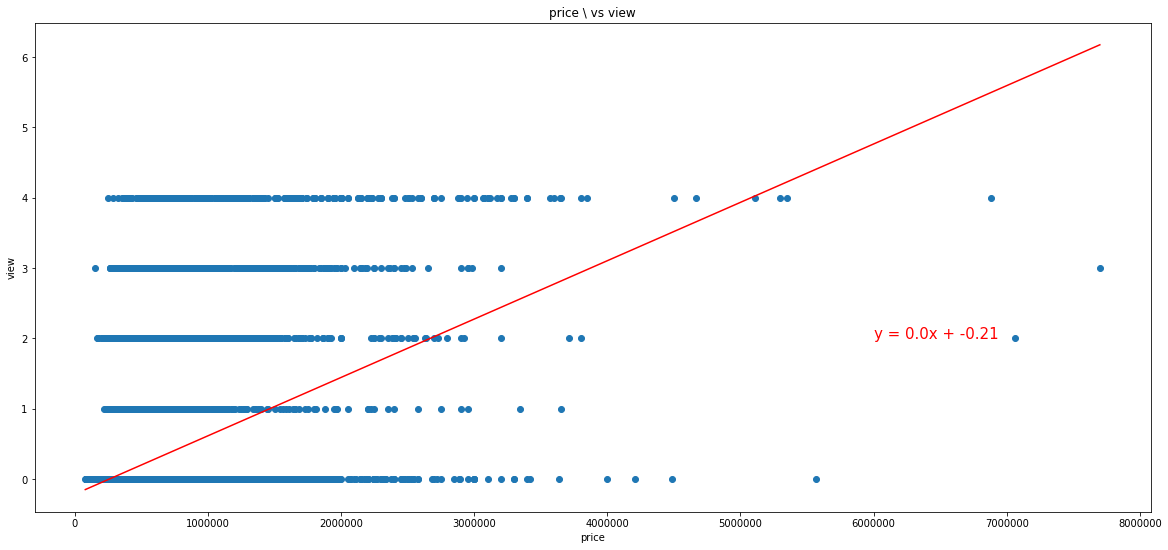

In [86]:
# Linear regression on # of bedrooms
x_values = new_housing_prices_df["price"]
y_values = new_housing_prices_df["view"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'price \ vs view' 
                        , 'view',(6000000, 2))

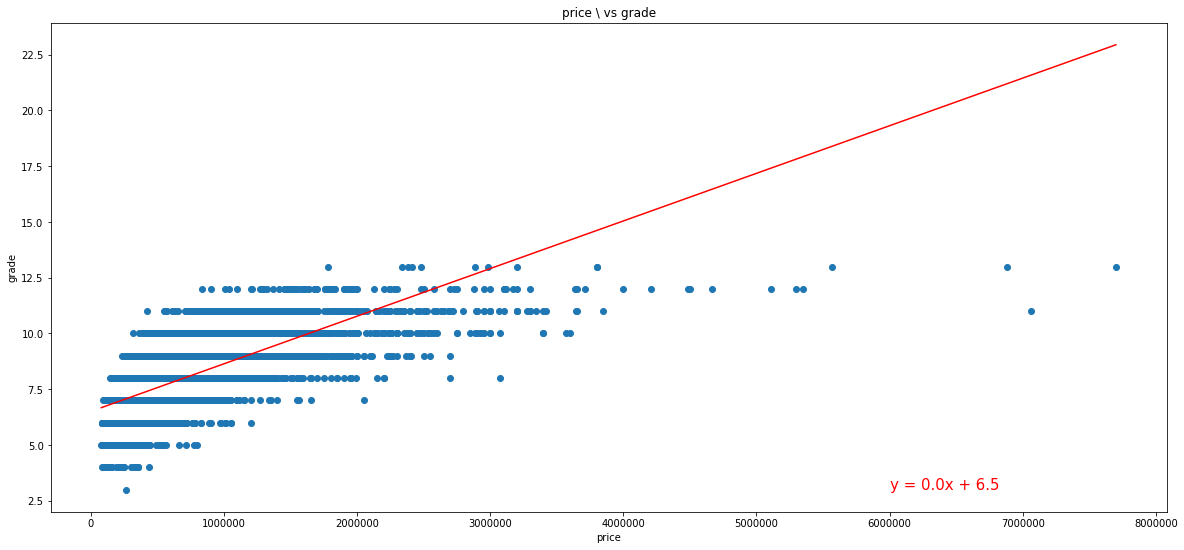

In [85]:
# Linear regression on # of bedrooms
x_values = new_housing_prices_df["price"]
y_values = new_housing_prices_df["grade"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'price \ vs grade' 
                        , 'grade',(6000000,3))